In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/model-alphabet-recogonizer/alphabel_recogonizer.pkl
/kaggle/input/target-images/target_labels.csv
/kaggle/input/target-images/target_images/line_6.png
/kaggle/input/target-images/target_images/line_5.png
/kaggle/input/target-images/target_images/text_extractor.py
/kaggle/input/target-images/target_images/line_4.png
/kaggle/input/target-images/target_images/line_3.png
/kaggle/input/target-images/target_images/line_1.png
/kaggle/input/target-images/target_images/line_2.png
/kaggle/input/target-images/target_images/.idea/.gitignore
/kaggle/input/target-images/target_images/.idea/workspace.xml


In [2]:
import pickle
import glob
import cv2
import matplotlib.pyplot as plt


In [3]:

images = [cv2.imread(file,0) for file in glob.glob("/kaggle/input/target-images/target_images/*.png")]



In [4]:
for image in images:
    # Preprocessing the image
    
    thresh = cv2.adaptiveThreshold(image, 2127, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    
    
    
    
    # Character_Segmentation
    
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
    image_internal = np.zeros(image.shape)
    internal_contours = []

    # Iterate through list of contour arrays

    for i in range(len(contours)):
  
        if hierarchy[0][i][3] != -1:
             internal_contours.append(contours[i])


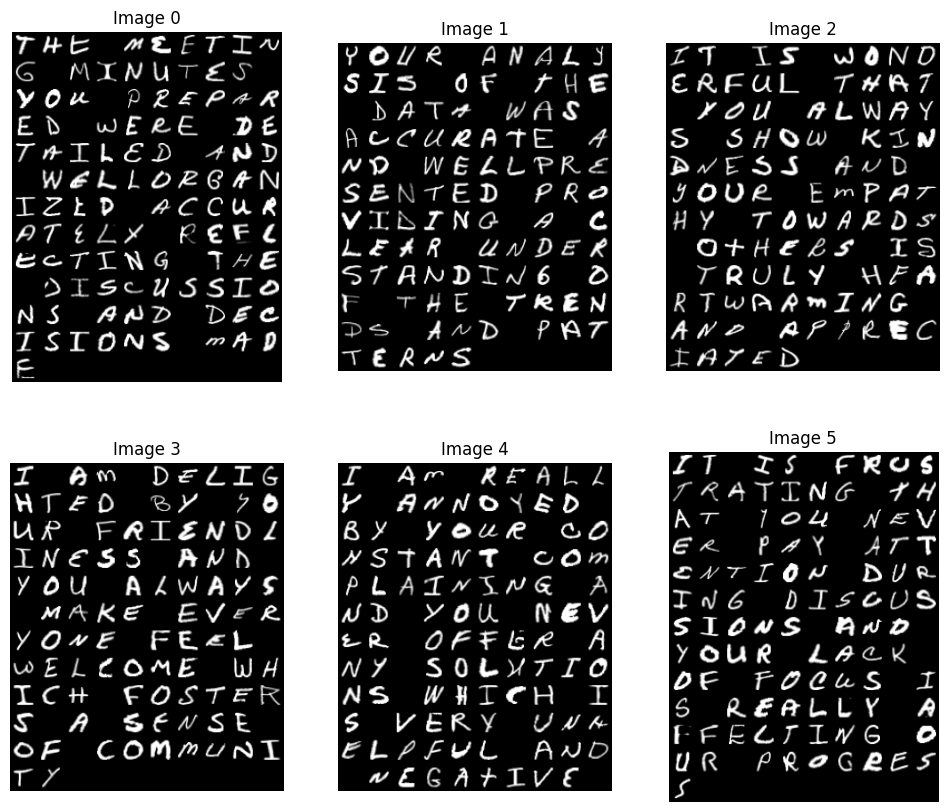

In [5]:
fig,axes = plt.subplots(2,3,figsize=(12,10))

for i,ax in enumerate(axes.ravel()):
    ax.axis('off')
    ax.imshow(images[i],'gray')
    ax.set_title(f'Image {i}')

# Preprocessing the image

In [6]:
for image in images:
    image = cv2.adaptiveThreshold(image, 2127, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    

    
    
    

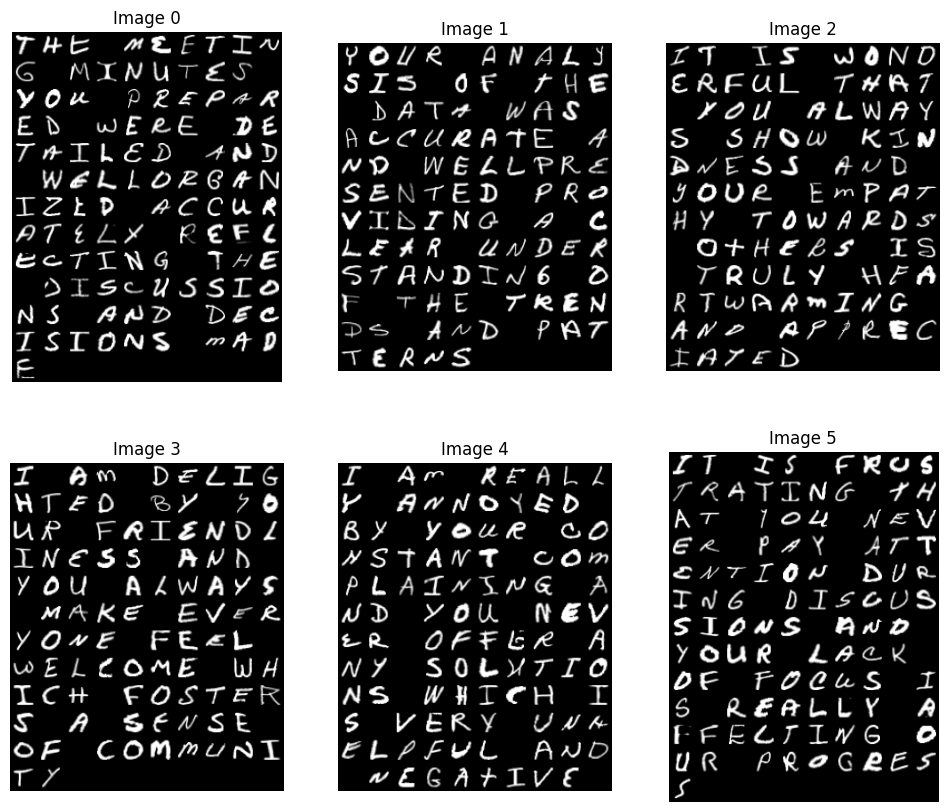

In [7]:
fig,axes = plt.subplots(2,3,figsize=(12,10))

for i,ax in enumerate(axes.ravel()):
    ax.axis('off')
    ax.imshow(images[i],'gray')
    ax.set_title(f'Image {i}')

# Sentiment Analyzer

In [8]:
import re
import numpy as np
from collections import defaultdict, Counter

# Sample training data
training_data = [
    ("I love this product! It's amazing and works perfectly.", "positive"),
    ("This is the worst experience I've ever had. Terrible service.", "negative"),
    ("It's an average product. Nothing special but not too bad either.", "neutral"),
    ("I am so happy with this purchase. It's fantastic!", "positive"),
    ("I hate this. It's the worst thing ever.", "negative"),
    ("It's okay, not great but not horrible either.", "neutral"),
    ("I AM REALLY FRUSTRATED BECAUSE YOU CONSTANTLY IGNORE MY MESSAGES AND YOU NEVER RESPOND ON TIME WHICH MAKES IT VERY HARD TO GET ANYTHING DONE", "negative"),
    ("IT MAKES ME UPSET THAT YOU NEVER TAKE RESPONSIBILITY FOR YOUR ACTIONS AND YOU ALWAYS BLAME OTHERS WHEN THINGS GO WRONG WORSENING THE SITUATION", "negative"),
    ("I CANNOT BELIEVE YOU MISSED ANOTHER DEADLINE AND YOUR LACK OF ATTENTION TO DETAIL IS CAUSING MAJOR PROBLEMS FOR THE ENTIRE TEAM WHICH IS UNACCEPTABLE", "negative"),
    ("IT ANNOYS ME WHEN YOU INTERRUPT DURING MEETINGS AND YOU NEVER LET ANYONE FINISH THEIR THOUGHTS DISRUPTING THE WHOLE CONVERSATION", "negative"),
    ("I AM TIRED OF YOUR EXCUSES EVERY TIME SOMETHING GOES WRONG AND YOU NEVER SEEM TO LEARN FROM YOUR MISTAKES WHICH IS VERY DISAPPOINTING.", "negative"),
    ("IT UPSETS ME THAT YOU ALWAYS ARRIVE LATE AND YOU NEVER RESPECT OTHER PEOPLES TIME CAUSING DELAYS AND FRUSTRATION FOR EVERYONE INVOLVED", "negative"),
    ("I AM REALLY ANGRY BECAUSE YOU NEVER PREPARE FOR MEETINGS AND YOUR LACK OF EFFORT IS EVIDENT WHICH IS VERY UNPROFESSIONAL.", "negative"),
    ("IT INFURIATES ME THAT YOU NEVER APPRECIATE THE HARD WORK OF OTHERS AND YOU ALWAYS TAKE CREDIT FOR THINGS YOU DID NOT DO WHICH IS UNFAIR AND WRONG", "negative"),
    ("I CANNOT STAND HOW YOU ALWAYS TALK DOWN TO PEOPLE AND YOUR CONDESCENDING ATTITUDE IS REALLY HURTFUL AND UNNECESSARY.", "negative"),
    ("IT IS VERY DISAPPOINTING THAT YOU NEVER FOLLOW THROUGH WITH YOUR PROMISES AND YOUR UNRELIABLE BEHAVIOR IS CAUSING A LOT OF PROBLEMS", "negative"),
    ("I AM VERY HAPPY BECAUSE YOU ALWAYS LISTEN CAREFULLY AND YOU MAKE EVERYONE FEEL VALUED WHICH CREATES A POSITIVE ENVIRONMENT.", "positive"),
    ("IT IS WONDERFUL HOW YOU ALWAYS COME PREPARED AND YOUR THOROUGHNESS MAKES A BIG DIFFERENCE IN OUR PRODUCTIVITY AND SUCCESS", "positive"),
    ("I APPRECIATE HOW YOU ALWAYS OFFER TO HELP AND YOUR WILLINGNESS TO ASSIST OTHERS IS TRULY ADMIRABLE AND MAKES EVERYTHING EASIER", "positive"),
    ("IT IS FANTASTIC THAT YOU ALWAYS HAVE A POSITIVE ATTITUDE AND YOUR ENTHUSIASM IS CONTAGIOUS MAKING THE WORKPLACE ENJOYABLE", "positive"),
    ("I AM GRATEFUL FOR YOUR SUPPORT AND YOU ALWAYS ENCOURAGE EVERYONE TO DO THEIR BEST WHICH IS VERY INSPIRING AND UPLIFTING", "positive"),
    ("IT MAKES ME HAPPY THAT YOU ALWAYS RECOGNIZE THE EFFORTS OF OTHERS AND YOUR APPRECIATION MOTIVATES EVERYONE TO KEEP WORKING HARD", "positive"),
    ("I AM REALLY IMPRESSED BY YOUR CREATIVITY AND YOU ALWAYS BRING FRESH IDEAS TO THE TABLE WHICH IS VERY BENEFICIAL FOR OUR PROJECTS", "positive"),
    ("IT IS AMAZING HOW YOU ALWAYS STAY CALM UNDER PRESSURE AND YOUR COMPOSURE HELPS EVERYONE STAY FOCUSED AND ON TRACK", "positive"),
    ("I AM THANKFUL FOR YOUR RELIABILITY AND YOU ALWAYS FOLLOW THROUGH WITH YOUR COMMITMENTS WHICH IS VERY REASSURING", "positive"),
    ("IT IS GREAT THAT YOU ALWAYS COMMUNICATE CLEARLY AND YOUR ABILITY TO CONVEY INFORMATION EFFECTIVELY IS VERY HELPFUL", "positive"),
    ("THE MEETING TODAY COVERED A LOT OF IMPORTANT POINTS AND THE DISCUSSION WAS VERY INFORMATIVE PROVIDING VALUABLE INSIGHTS FOR EVERYONE", "neutral"),
    ("YOUR PRESENTATION WAS CLEAR AND CONCISE AND IT PROVIDED A GOOD OVERVIEW OF THE TOPIC COVERING ALL THE KEY POINTS EFFECTIVELY.", "neutral"),
    ("I APPRECIATE THE FEEDBACK YOU PROVIDED AND IT WAS CONSTRUCTIVE AND WILL HELP IMPROVE THE QUALITY OF OUR WORK MOVING FORWARD", "neutral"),
    ("THE EVENT YESTERDAY WAS WELLORGANIZED AND THE AGENDA WAS FOLLOWED SMOOTHLY ENSURING EVERYTHING WENT ACCORDING TO PLAN", "neutral"),
    ("YOUR REPORT WAS THOROUGH AND DETAILED INCLUDING ALL THE NECESSARY INFORMATION AND PRESENTING IT IN A WELLSTRUCTURED MANNER", "neutral"),
    ("I FOUND YOUR ARTICLE INTERESTING AND WELLWRITTEN AND IT COVERED THE SUBJECT COMPREHENSIVELY WHILE BEING EASY TO UNDERSTAND", "neutral"),
    ("THE TRAINING SESSION WAS USEFUL PROVIDING PRACTICAL KNOWLEDGE AND SKILLS THAT WILL BE BENEFICIAL IN OUR DAILY TASKS", "neutral"),
    ("YOUR EMAIL WAS CLEAR AND INFORMATIVE ADDRESSING ALL THE IMPORTANT POINTS AND PROVIDING THE NECESSARY UPDATES", "neutral"),
    ("I ATTENDED THE WORKSHOP YOU RECOMMENDED AND IT WAS INSIGHTFUL AND PROVIDED VALUABLE INFORMATION ON THE SUBJECT MATTER", "neutral"),
    (
    "THE FEEDBACK SESSION WAS PRODUCTIVE ALLOWING FOR OPEN COMMUNICATION AND THE EXCHANGE OF CONSTRUCTIVE IDEAS",
    "neutral"),

]

# Define positive and negative word lexicons
positive_words = ["good", "great", "awesome", "excellent", "happy", "love", "fantastic", "amazing", "wonderful",
                  "positive"]
negative_words = ["bad", "terrible", "awful", "worst", "hate", "horrible", "negative", "sad", "angry", "disappointed"]




def clean_text(text):
    # Remove punctuation and convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    return text


def tokenize(text):
    # Split the text into words
    return text.split()


# Preprocess and tokenize the training data
preprocessed_data = []
for text, label in training_data:
    cleaned_text = clean_text(text)
    tokens = tokenize(cleaned_text)
    preprocessed_data.append((tokens, label))

# Separate the tokens and labels for easy access
tokens_list = [tokens for tokens, label in preprocessed_data]
labels = [label for tokens, label in preprocessed_data]


def extract_features(tokens_list):
    word_counts = defaultdict(Counter)
    for tokens, label in zip(tokens_list, labels):
        word_counts[label].update(tokens)
    return word_counts


word_counts = extract_features(tokens_list)

# Calculate prior probabilities
label_counts = Counter(labels)
total_count = len(labels)
priors = {label: count / total_count for label, count in label_counts.items()}

# Calculate likelihood probabilities with Laplace smoothing
vocabulary = set(word for tokens in tokens_list for word in tokens)
vocab_size = len(vocabulary)

likelihoods = {}
for label in label_counts:
    total_words = sum(word_counts[label].values())
    likelihoods[label] = {word: (word_counts[label][word] + 1) / (total_words + vocab_size) for word in vocabulary}


def predict(text):
    cleaned_text = clean_text(text)
    tokens = tokenize(cleaned_text)

    log_probs = {label: np.log(prior) for label, prior in priors.items()}

    for label in likelihoods:
        for token in tokens:
            if token in likelihoods[label]:
                log_probs[label] += np.log(likelihoods[label][token])
            else:
                log_probs[label] += np.log(1 / (sum(word_counts[label].values()) + vocab_size))

    return max(log_probs, key=log_probs.get).capitalize()


# Prediction the sentiment of each Image

In [9]:
sentiment_predicted =[]

In [10]:
for image in images:
    
    
    #######        Character Segmentation
    ######   
    
    
    
    contours, hierarchy = cv2.findContours(image, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
    image_internal = np.zeros(image.shape)
    internal_contours = []



    for i in range(len(contours)):
        if hierarchy[0][i][3] != -1:
            internal_contours.append(contours[i])
       
    def sort_contours_by_y_then_x(contours):
    # Sort contours by y coordinate
        contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[1])
    
    # Group contours by y coordinate within a range
        grouped_points = []
        current_group = [cv2.boundingRect(contours[0])[1]]
    
        for i in range(1, len(contours)):
            if cv2.boundingRect(contours[i])[1] - current_group[-1] <= 15:
                current_group.append(cv2.boundingRect(contours[i])[1])
            else:
                grouped_points.append(current_group)
                current_group = [cv2.boundingRect(contours[i])[1]]
        grouped_points.append(current_group)
    
        sorted_contours = []
    
    # Sort each group by x coordinate
        for group in grouped_points:
            list_by_y = [c for c in contours if cv2.boundingRect(c)[1] in group]
            list_sorted_by_x = sorted(list_by_y, key=lambda c: cv2.boundingRect(c)[0])
            sorted_contours.extend(list_sorted_by_x)
    
        return sorted_contours


    sorted_contours = sort_contours_by_y_then_x(internal_contours)
    
    
    area_characters = np.array([cv2.contourArea(contour) for contour in sorted_contours])
    
    
    min_contour_area = 50
    sorted_contours = [c for c in sorted_contours if cv2.contourArea(c) > min_contour_area]
    
    
    
    
    
    ##### Importing the Model
    ####
    
    model = pickle.load(open('/kaggle/input/model-alphabet-recogonizer/alphabel_recogonizer.pkl','rb'))
    
    
    
    #### Recogonize the Characters
    
    
    
    
    # Preporcessing the image
    
    
    def preprocess_char_image(char_image):
        char_image = char_image.astype('float32')/255.0
        ret,char_image = cv2.threshold(char_image,0.5,1,cv2.THRESH_BINARY)
    

        char_image = cv2.resize(char_image, (28, 28),cv2.INTER_CUBIC)
   
        
        char_image = np.expand_dims(char_image, -1)
        char_image = np.expand_dims(char_image, axis=0) 
        return char_image
    
    



    #######Finally :- Recognizing the alphabets
    
    letters = [chr(i) for i in range(65,91)]
    
    # List to store character images
    predicted_characters = []
    prev_x= None
    space_threshold =14



    for contour in sorted_contours:
    # Get the bounding box of the contour
        x, y, w, h = cv2.boundingRect(contour)

    # Extract the character
        char_image = image[y:y+h, x:x+w]
        char_image = preprocess_char_image(char_image)
    
        if prev_x != None and x-prev_x >= space_threshold :
            predicted_characters.append(' ')
        
    
        predicted_characters.append(letters[np.argmax(model.predict(char_image),axis=1)[0]])
    
        prev_x =x+w
    
    

    recogonized_text = ''.join(predicted_characters)
    
    predicted_sentiment = predict('recogonized_text')
    sentiment_predicted.append(predicted_sentiment)
    
    
    
    

    
    
    


2024-06-28 16:28:57.488127: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-28 16:28:57.488254: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-28 16:28:57.647898: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 681ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


I0000 00:00:1719592150.174427      64 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2024-06-28 16:29:10.176365: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━

In [11]:
sentiment_predicted 

['Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral']

In [12]:
target_labels  = pd.read_csv('/kaggle/input/target-images/target_labels.csv')
target_labels

,file,sentiment
0,line_1.png,Angry
1,line_2.png,Angry
2,line_3.png,Happy
3,line_4.png,Happy
4,line_5.png,Neutral
5,line_6.png,Neutral


In [13]:
sentiment_actual = target_labels['sentiment'].values
sentiment_actual 

array(['Angry', 'Angry', 'Happy', 'Happy', 'Neutral', 'Neutral'],
      dtype=object)

In [14]:
from sklearn.metrics import accuracy_score

print(f'Accuracy {accuracy_score(np.array(sentiment_predicted) ,sentiment_actual )}')


Accuracy 0.3333333333333333
